In [4]:
import cv2
import time
import matplotlib.pyplot as plt

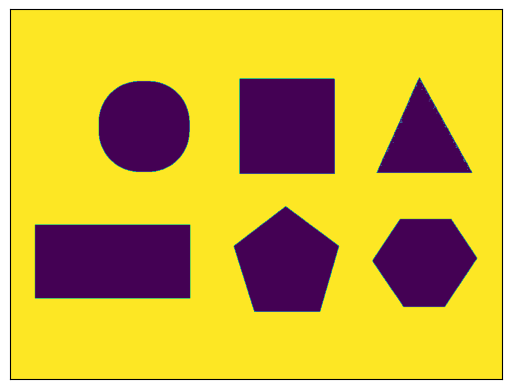

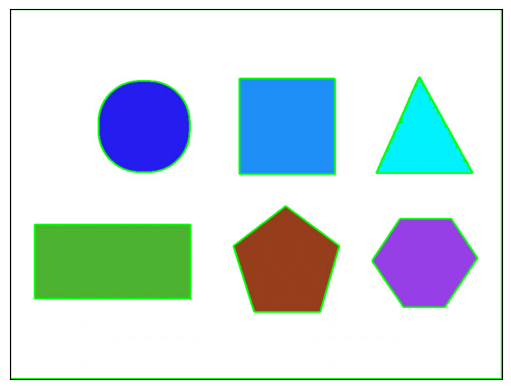

True

In [5]:
# read the image
image = cv2.imread('C:\\Users\\sacha\\OneDrive\\Desktop\\Archives\\2024_2025\\Travail Perso M1\\My_learning_Project\\Contour_detection_project\\shapes.jpg')
     

new_frame_time = 0
prev_frame_time = 0
# convert the image to grayscale format
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# time when we finish processing for this frame
new_frame_time = time.time()

# Calculating the fps
# fps will be number of frame processed in given time frame
# since their will be most of time error of 0.001 second
# we will be subtracting it to get more accurate result
fps = 1 / (new_frame_time - prev_frame_time)
prev_frame_time = new_frame_time
fps, prev_frame_time

# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 220, 255, cv2.THRESH_BINARY)
cv2.putText(img = thresh,
            text = f'FPS Display',
            org = (20, 40),
            fontFace = cv2.FONT_HERSHEY_SIMPLEX,
            fontScale = 1,
            color = (255, 255, 255),
            thickness = 2 )
cv2.putText(img = thresh,
            text = f'FPS: {int(fps)}',
            org = (20, 60),
            fontFace = cv2.FONT_HERSHEY_PLAIN,
            fontScale = 1,
            color = (255,0,255),
            thickness = 1)
# visualize the binary image
plt.imshow(thresh)
plt.xticks([]), plt.yticks([]) # optional line of code, just to hide tick values on X and Y axis if needed
plt.show()
cv2.waitKey(0)
cv2.imwrite('image_thres1.jpg', thresh)

# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
plt.imshow(image_copy)
plt.xticks([]), plt.yticks([]) # optional line of code, just to hide tick values on X and Y axis if needed
plt.show()

cv2.imwrite('contours_none_image1.jpg', image_copy)

Number of contours detected: 7


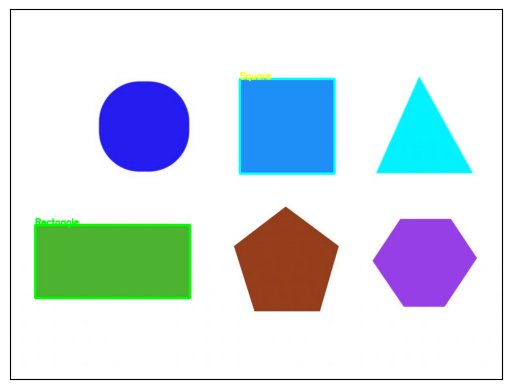

In [8]:
import cv2
import numpy as np

img = cv2.imread('C:\\Users\\sacha\\OneDrive\\Desktop\\Archives\\2024_2025\\Travail Perso M1\\My_learning_Project\\Contour_detection_project\\shapes.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,210,255,100)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
print(f"Number of contours detected: {len(contours)}")

for cnt in contours:
   x1,y1 = cnt[0][0]
   approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
   if len(approx) == 4:
      x, y, w, h = cv2.boundingRect(cnt)
      ratio = float(w)/h
      if ratio >= 0.9 and ratio <= 1.1:
         img = cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
         cv2.putText(img, 'Square', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
      else:
         cv2.putText(img, 'Rectangle', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
         img = cv2.drawContours(img, [cnt], -1, (0,255,0), 3)

# see the results
plt.imshow(img)
plt.xticks([]), plt.yticks([]) # optional line of code, just to hide tick values on X and Y axis if needed
plt.show()